# What makes us stay longer in our current jobs ?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data_helpers import bucketize_last_hire_date

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(color_codes=True)

## Loading data

In [2]:
df = pd.read_csv('data/stackoverflow-2019/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df.shape

(88883, 85)

In [4]:
df2 = pd.read_csv('data/stackoverflow-2019/survey_results_schema.csv')
df2.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


## Part I: Does the job role make professionals stay longer in a job ?

First, we need to find in the data how can we calculate how long each professional stays in a job.

In [5]:
df2[df2.QuestionText == 'When was the last time that you took a job with a new employer?']['Column'].values[0]

'LastHireDate'

In [6]:
df.LastHireDate.value_counts()

Less than a year ago                                    25844
1-2 years ago                                           21365
More than 4 years ago                                   14594
3-4 years ago                                           11597
NA - I am an independent contractor or self employed     3426
I've never had a job                                     3028
Name: LastHireDate, dtype: int64

In [7]:
df2[df2.QuestionText == 'Which of the following best describes your current employment status?']['Column'].values[0]

'Employment'

In [8]:
df.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

As we are interested only in analyzing professional who current work for a employer, we are going to filter our data set.

In [9]:
p1_df = df[
            (df.LastHireDate != 'NA - I am an independent contractor or self employed') &
            (df.LastHireDate != "I've never had a job") &
            (df.Employment.isin(['Employed full-time', 'Employed part-time']))
          ][['DevType', 'LastHireDate']]

p1_df.shape

(68063, 2)

Now, we also have to find how to extract different job titles from the interviewed professionals.

In [10]:
df2[df2.QuestionText == 'Which of the following describe you? Please select all that apply.']['Column'].values[0]

'DevType'

In [11]:
p1_df.DevType.value_counts().head()

Developer, full-stack                                             7550
Developer, back-end                                               4550
Developer, back-end;Developer, front-end;Developer, full-stack    2072
Developer, front-end                                              1961
Developer, mobile                                                 1938
Name: DevType, dtype: int64

We definitely started to understand our data! We have information about how long professionals are in their current jobs and we can analyze it by job title (different professionals). However, we need to transform the data in order to use it properly.

### Data preparation

First, we need to convert `LastHireDate` to discrete values:

| Answer | Bucket |
| --- | --- |
| Less than a year ago | 1 |
| 1-2 years ago | 2 |
| 3-4 years ago | 3 |
| More than 4 years ago | 4 |


In [12]:
p1_df.loc[:,'YearsInTheJob'] = p1_df.LastHireDate.apply(bucketize_last_hire_date)
p1_df = p1_df.drop('LastHireDate', axis=1)
p1_df['YearsInTheJob'].value_counts()

 1    22378
 2    19080
 4    13453
 3    10531
-1     2621
Name: YearsInTheJob, dtype: int64

Then, we need to clean `DevType`. As a professional can have multiple job roles/titles and we are interested in analyzing `YearsInTheJob` per job role, we will attribute `YearsInTheJob` to each job role defined by the professional.

In [13]:
p1_df.loc[:,'JobRole'] = p1_df['DevType'].apply(lambda x: str(x).split(';'))
p1_df= p1_df.drop('DevType', axis=1)
p1_df = p1_df.explode('JobRole')
p1_df = p1_df[p1_df.JobRole != 'nan']
p1_df.head()

,YearsInTheJob,JobRole
2,2,Designer
2,2,"Developer, back-end"
2,2,"Developer, front-end"
2,2,"Developer, full-stack"
3,1,"Developer, full-stack"


### Answering the question

For each job role, we want to know how the most frequent `YearsInTheJob`. As `YearsInTheJob` is not continuous, we will use the mode.

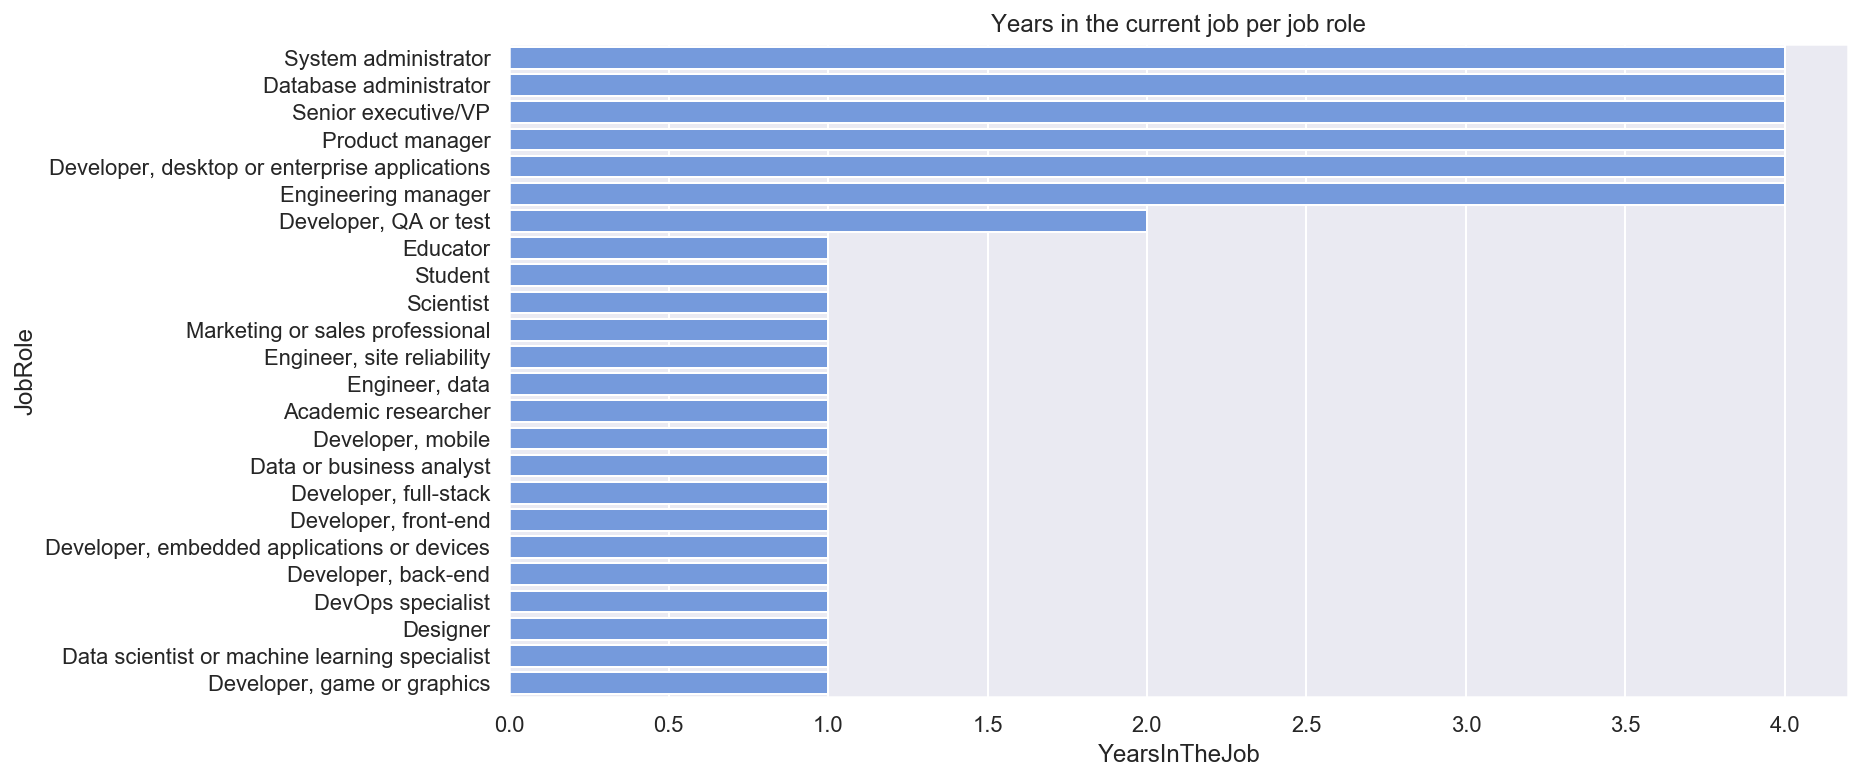

In [14]:
agg_p1_df = p1_df.groupby(['JobRole'])['YearsInTheJob'].agg(pd.Series.mode)\
                 .to_frame().reset_index()\
                 .sort_values(by='YearsInTheJob', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='YearsInTheJob', y='JobRole', orient='h', data=agg_p1_df, color='cornflowerblue');
plt.title('Years in the current job per job role');

#### Conclusions

* There are 6 job roles where most of professinals are 4 years or more in their current jobs:

  * System administrator
  * Database administrator
  * Senior executive/VP
  * Product manager
  * Engineering manager
  * Developer, desktop or enterprise applications


* It seems professionals working in management positions stay longer in their jobs. One hypothesis is those professionals developed their entire careers in the same company. This is something we will investigate in the second part of this analysis. The only exception in this pattern is `Developer, desktop or enterprise applications`.


* We can also observe `Developer QA or test` has a mode higher than other developers.


* Regarding the remaining job roles, we can observer turn over is very high as mostly of the interviewed professionals are less than 1 year in their jobs. But, what happens to developers who are more than 1 year in their current jobs ?

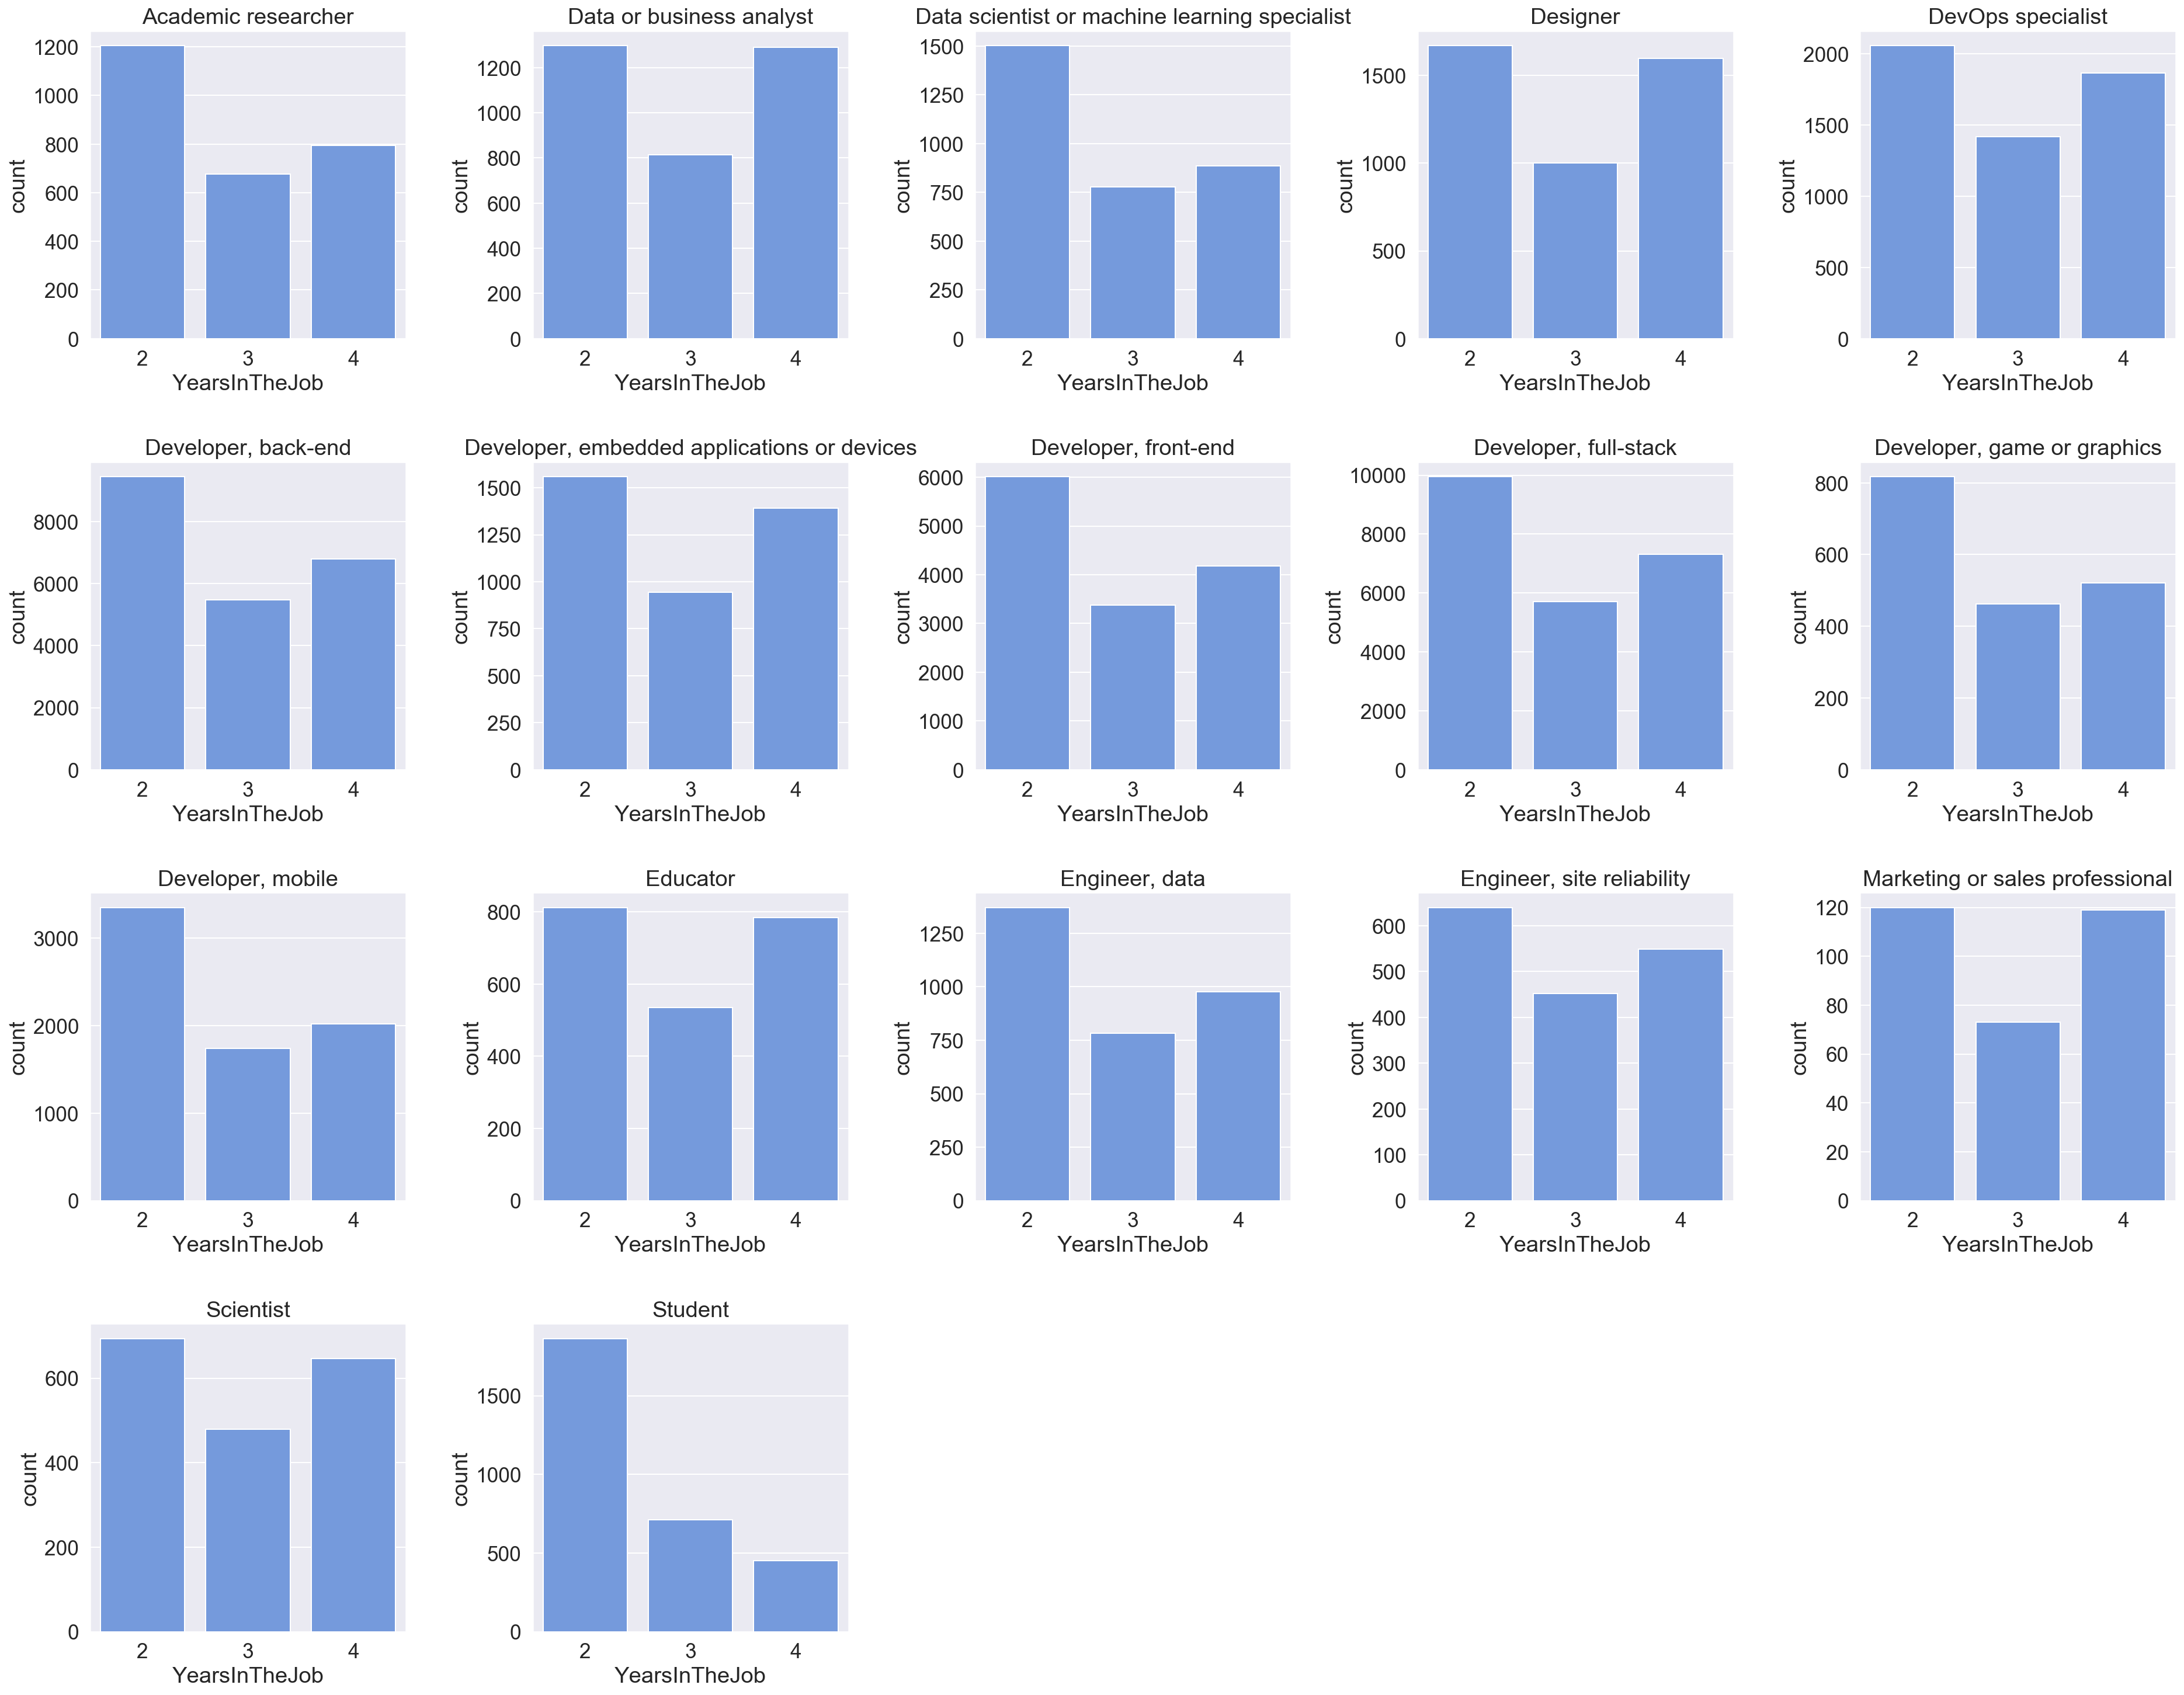

In [16]:
sns.set(font_scale=1.6)

agg_p1a_df = p1_df[(p1_df.YearsInTheJob > 1) &
                   (~p1_df.JobRole.isin(['System administrator', 'Database administrator', 
                                         'Senior executive/VP', 'Product manager', 'Engineering manager', 
                                         'Developer, desktop or enterprise applications', 'Developer, QA or test']))
                  ]

job_roles = sorted(agg_p1a_df.JobRole.unique())

fig = plt.figure(figsize=(32, 32))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


for idx, job_role in enumerate(job_roles):
    ax = fig.add_subplot(5, 5, idx + 1)
    
    data = agg_p1a_df[agg_p1a_df.JobRole == job_role].groupby(['YearsInTheJob'])\
                            .agg({'YearsInTheJob': 'count'})\
                            .rename(columns={'YearsInTheJob': 'count'}).reset_index()
    
    sns.barplot(x='YearsInTheJob', y='count', data=data, color='cornflowerblue', ax=ax)
    ax.set_title(job_role)
    
plt.show();

sns.set(font_scale=1)

#### Conclusions

* Most of interviewed professionals who are **at least 1 year** in their current jobs are currently **1-2 years** in the jobs. 


* It is more common staying **More than 4 years** than **3-4 years** for most of the job roles